In [1]:
import os
import torch
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from torch.utils.data import DataLoader
from modules.lifter_2d_3d.dataset.groundtruth_keypoint_dataset import GroundTruthKeypointDataset
from modules.lifter_2d_3d.model.linear_model.lit_linear_model import LitSimpleBaselineLinear
from modules.utils.visualization import (
    plot_samples
)
from IPython.display import display
from pathlib import Path
pl.seed_everything(1234)

# ------------
# dataset path
# ------------
dataset_root_path = Path('/root/data/processed/synthetic_cabin_ir/Rear_Mirror')
annotation_path = dataset_root_path / 'annotations'
# ------------
# model
# ------------
image_width = 1280
image_height = 1024
batch_size = 64
max_epoch = 200
val_check_period = 5
early_stopping_patience = 5
lit_model = LitSimpleBaselineLinear(exclude_ankle=True, exclude_knee=True)
# ------------
# saved model path
# ------------
saved_model_path = './saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir/Rear_Mirror/gt_2d/'

train_dataset = GroundTruthKeypointDataset(
    annotation_file=(annotation_path / 'person_keypoints_train.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    is_center_to_neck=True,
    is_normalize_to_bbox=False,
    is_normalize_to_pose=True,
    is_normalize_rotation=True
)
val_dataset = GroundTruthKeypointDataset(
    annotation_file=(annotation_path / 'person_keypoints_val.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    is_center_to_neck=True,
    is_normalize_to_bbox=False,
    is_normalize_to_pose=True,
    is_normalize_rotation=True
)
test_dataset = GroundTruthKeypointDataset(
    annotation_file=(annotation_path / 'person_keypoints_test.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    is_center_to_neck=True,
    is_normalize_to_bbox=False,
    is_normalize_to_pose=True,
    is_normalize_rotation=True
)

print(
    'train_dataset', len(train_dataset),
    'val_dataset', len(val_dataset),
    'test_dataset', len(test_dataset)
)
train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True, shuffle=True, num_workers=24)
val_loader = DataLoader(val_dataset, batch_size=batch_size, drop_last=True, num_workers=24)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=24)

model_checkpoint = ModelCheckpoint(monitor='val_loss',mode='min', save_top_k=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=early_stopping_patience)


if not os.path.exists(saved_model_path):
    os.makedirs(saved_model_path)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
trainer = pl.Trainer(
    # max_steps=10,
    max_epochs=max_epoch,
    callbacks=[model_checkpoint, early_stopping],
    accelerator=device,
    check_val_every_n_epoch=val_check_period,
    default_root_dir=saved_model_path,
    gradient_clip_val=1.0
)
trainer.fit(lit_model, train_loader, val_loader)

Global seed set to 1234
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir/Rear_Mirror/gt_2d/lightning_logs


train_dataset 37499 val_dataset 6250 test_dataset 6251


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type          | Params
----------------------------------------
0 | model | BaselineModel | 4.3 M 
----------------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.105    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 128 samples : 2746.6142177581787
activity_macro_mpjpe nan


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 2925 batches: 288.94872402024066
val MPJPE from: 6208 samples : 47.94960841536522
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #2
training loss from 2925 batches: 67.58745332176869
val MPJPE from: 6208 samples : 38.494061678647995
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #3
training loss from 2925 batches: 56.84984530775975
val MPJPE from: 6208 samples : 34.731585532426834
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #4
training loss from 2925 batches: 54.01531472547441
val MPJPE from: 6208 samples : 35.97300499677658
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #5
training loss from 2925 batches: 51.992489112238594
val MPJPE from: 6208 samples : 34.76130589842796
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #6
training loss from 2925 batches: 50.048058543704514
val MPJPE from: 6208 samples : 32.60558098554611
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #7
training loss from 2925 batches: 48.49713782978873
val MPJPE from: 6208 samples : 32.725390046834946
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #8
training loss from 2925 batches: 47.13172517143763
val MPJPE from: 6208 samples : 31.30437433719635
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #9
training loss from 2925 batches: 46.219657728305236
val MPJPE from: 6208 samples : 31.91472962498665
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #10
training loss from 2925 batches: 45.38574743984092
val MPJPE from: 6208 samples : 30.593736097216606
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #11
training loss from 2925 batches: 44.764684102474114
val MPJPE from: 6208 samples : 30.089307576417923
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #12
training loss from 2925 batches: 44.15540117993314
val MPJPE from: 6208 samples : 30.718646943569183
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #13
training loss from 2925 batches: 43.737743303307106
val MPJPE from: 6208 samples : 30.350055545568466
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #14
training loss from 2925 batches: 43.3065993599912
val MPJPE from: 6208 samples : 30.13206087052822
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #15
training loss from 2925 batches: 43.08056250341937
val MPJPE from: 6208 samples : 29.96777556836605
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #16
training loss from 2925 batches: 42.78141453225388
val MPJPE from: 6208 samples : 30.521459877490997
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #17
training loss from 2925 batches: 42.68486094143656
val MPJPE from: 6208 samples : 30.500417575240135
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #18
training loss from 2925 batches: 42.41027091176082
val MPJPE from: 6208 samples : 30.155358836054802
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #19
training loss from 2925 batches: 42.25084475981883
val MPJPE from: 6208 samples : 29.584897682070732
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #20
training loss from 2925 batches: 42.16844557824298
val MPJPE from: 6208 samples : 30.149631202220917
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #21
training loss from 2925 batches: 42.05600457313733
val MPJPE from: 6208 samples : 29.85331229865551
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #22
training loss from 2925 batches: 41.99741241259453
val MPJPE from: 6208 samples : 29.86919693648815
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #23
training loss from 2925 batches: 41.83263420676574
val MPJPE from: 6208 samples : 28.814760968089104
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #24
training loss from 2925 batches: 41.921657477943306
val MPJPE from: 6208 samples : 30.33384308218956
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #25
training loss from 2925 batches: 41.914414055327065
val MPJPE from: 6208 samples : 29.48796935379505
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #26
training loss from 2925 batches: 41.82703532979019
val MPJPE from: 6208 samples : 30.533812940120697
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #27
training loss from 2925 batches: 41.786549920455
val MPJPE from: 6208 samples : 30.714627355337143
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #28
training loss from 2925 batches: 41.77015309532484
val MPJPE from: 6208 samples : 30.9344120323658
activity_macro_mpjpe nan


In [2]:
with open(f'{saved_model_path}/best_model_path.txt', 'w') as f:
    f.writelines(model_checkpoint.best_model_path)
best_checkpoint_path = model_checkpoint.best_model_path
trainer.test(ckpt_path=best_checkpoint_path, dataloaders=test_loader)

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir/Rear_Mirror/gt_2d/lightning_logs/version_0/checkpoints/epoch=114-step=67275.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir/Rear_Mirror/gt_2d/lightning_logs/version_0/checkpoints/epoch=114-step=67275.ckpt


Testing: 0it [00:00, ?it/s]

MPJPE: 35.267952919779084
PJPE
                     PJPE
nose            26.494757
left_eye        26.104088
right_eye       28.489403
left_ear        22.376962
right_ear       23.763995
left_shoulder    8.807675
right_shoulder   8.808845
left_elbow      72.984718
right_elbow     53.024674
left_wrist      48.938060
right_wrist     56.423966
left_hip        40.433511
right_hip       41.832733
activities_mpjpe:
{}
test mpjpe: 35.267952919779084
activity_macro_mpjpe nan


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           mpjpe           │    35.267952919779084     │
└───────────────────────────┴───────────────────────────┘

[{'mpjpe': 35.267952919779084}]

In [3]:
trainer.model.test_history[0]['pjpe']

,PJPE
nose,26.494757
left_eye,26.104088
right_eye,28.489403
left_ear,22.376962
right_ear,23.763995
left_shoulder,8.807675
right_shoulder,8.808845
left_elbow,72.984718
right_elbow,53.024674
left_wrist,48.938060


In [4]:
trainer.model.test_history[0]['mpjpe']

35.267952919779084

[465.0, 328.0, 724.0, 722.0]
[483.0, 420.0, 730.0, 662.0]
[474.0, 212.0, 725.0, 645.0]


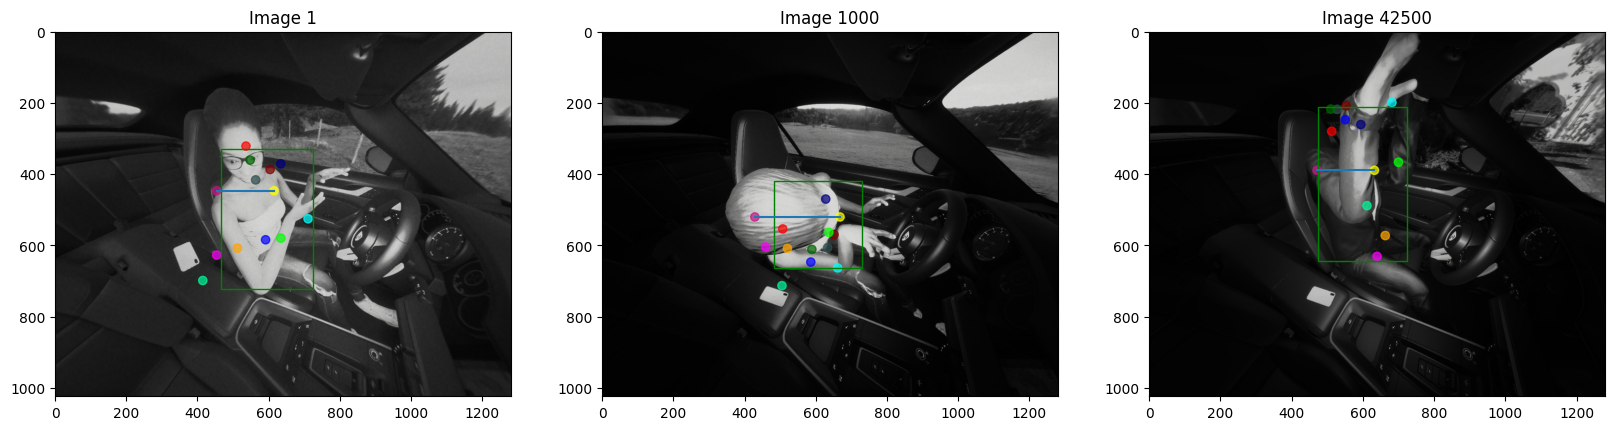

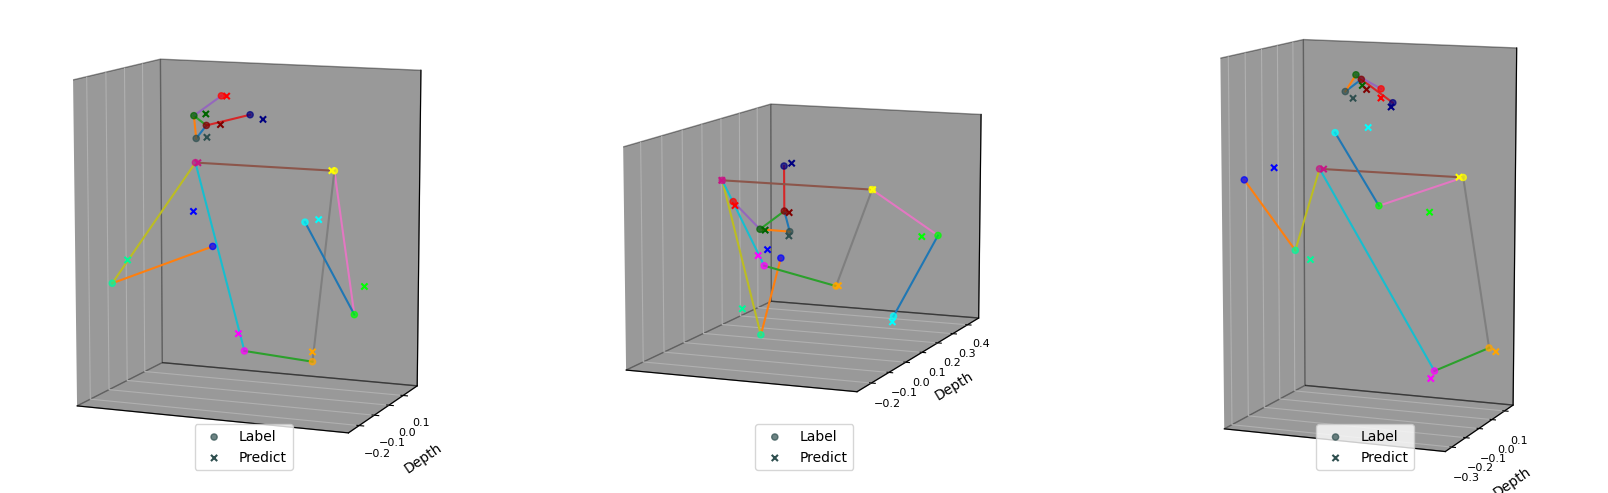

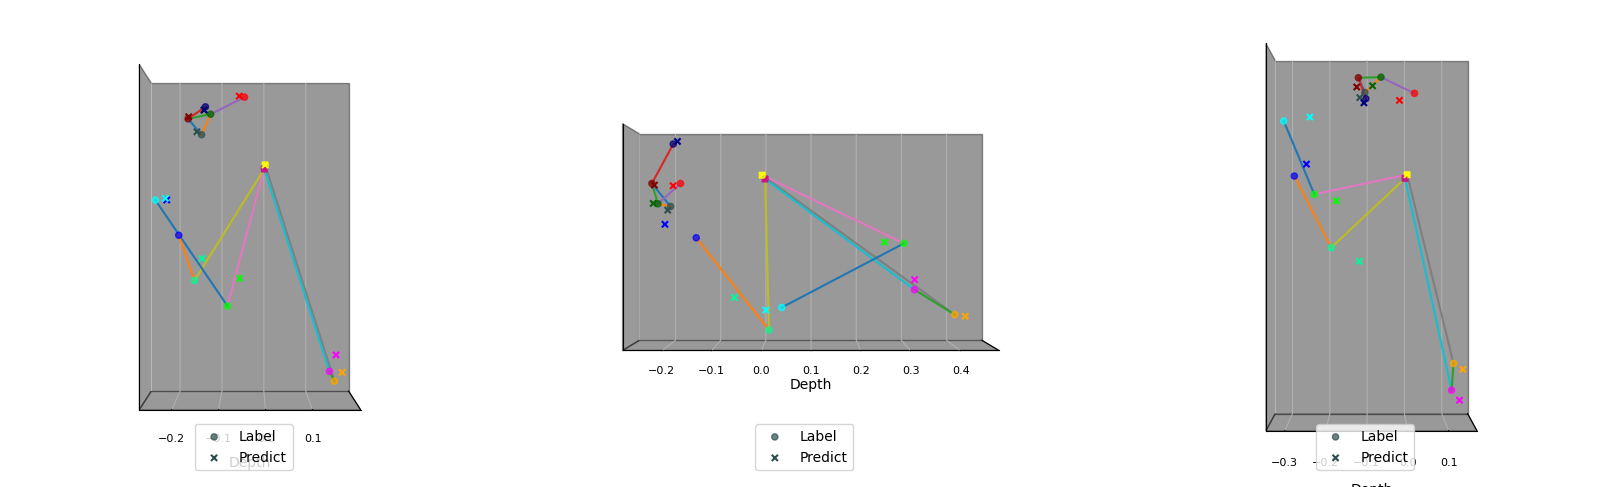

In [5]:
plot_samples(
    dataset_root_path,
    trainer.model,
    test_loader,
    'test',
    img_figsize=(20, 10),
    # img_width=image_width,
    # img_height=image_height,
    plot_figsize=(20.5, 10),
    sample_indices=[1, 1000, 5000]
)